<a href="https://colab.research.google.com/github/daniel-sjkdm/PandaCovid/blob/master/PandaCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 analisys 

Covid 19 is a huge breakdown for humanity and to see how it has impacted the
countries around the world I use the python's pandas library to perform
an analysis and make conclusions about the data.


## About the dataset

The dataset was downloaded from kaggle and is a set of csv files, you can get it at [1].

## Sources

1. [Coronavirus Dataset](https://www.kaggle.com/imdevskp/corona-virus-report?select=full_grouped.csv)

In [ ]:
!pip install tabulate -q  

In [299]:
from google.colab import drive
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
from pprint import pprint
import pandas as pd
import numpy as np
import tabulate
import os
import re

In [300]:
sns.set_theme()

In [301]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the files


There are many files in the dataset from kaggle I've downloaded. The one I'll read is the following:

1. full_grouped.csv

The other ones seems to be created from this one by grouping the fields.

In [302]:
dataset_path = Path("/content/drive/My Drive/Datasets/Covid/coronavirus-report")

In [303]:
df = pd.read_csv(dataset_path/"full_grouped.csv")

df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


## Exploring the data

Once the dataframes are loaded the data they have must be explored to see which fields are valid/invalid.

In [304]:
# The datatype of each field can be displayed with the dtype attribute

print("Data types\n")
print(df.dtypes)

Data types

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object


In [305]:
# Check for existing null values in the dataframe

print("Are there null values in any column?\n")
df.isnull().any()

Are there null values in any column?



Date              False
Country/Region    False
Confirmed         False
Deaths            False
Recovered         False
Active            False
New cases         False
New deaths        False
New recovered     False
WHO Region        False
dtype: bool

In [306]:
# How many valid and valid values for each field are there?
# This is the method one!

fields = list(df.keys())

for field in fields:
  valid = df[field].isnull().value_counts().loc[False]
  print(f"Valid rows in {field} = {valid}")

Valid rows in Date = 35156
Valid rows in Country/Region = 35156
Valid rows in Confirmed = 35156
Valid rows in Deaths = 35156
Valid rows in Recovered = 35156
Valid rows in Active = 35156
Valid rows in New cases = 35156
Valid rows in New deaths = 35156
Valid rows in New recovered = 35156
Valid rows in WHO Region = 35156


In [307]:
# To get the columns that has valid values, mask the dataframe with
# the column(s) of your like. Here I'll display the valid values
# each field has
# This is the method 2!

table = []
header = ["Column", "Valid fiels"]

valid = df.notnull()
keys = list(df.keys())

for key in keys:
  valid_rows = df[valid[key]][key].count()
  table.append([key, valid_rows])


print(tabulate.tabulate(table, header))

Column            Valid fiels
--------------  -------------
Date                    35156
Country/Region          35156
Confirmed               35156
Deaths                  35156
Recovered               35156
Active                  35156
New cases               35156
New deaths              35156
New recovered           35156
WHO Region              35156


## Performing analisys 


Statistics can be computed easily with the built in methods pandas has for the Data Frame objects.

For this dataset, the fields of interest (numeric ones) are:
  + Confirmed 
  + Deaths
  + Recovered
  + Active 
  + New cases
  + New recovered


It's also very useful to visualize the data using plots to have a better
undestanding of the fields in the dataframe.

The plots tell us a lot about the data like:

+ Relationship between variables
+ If a linear regression can be performed to make a predictive model
+ Which method would best fit the data to make a predictive model

As it's well said: an image's worth more than thousand words. 

In [308]:
# A general overview of the entire dataframe

df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [309]:
# Quantiles: ratio of the data that's below a given threshold
# The 0.5 quantile is the mean value (or average) 

df.quantile(q=np.arange(0.1, 1, 0.1))

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.3,9.0,0.0,0.0,2.0,0.0,0.0,0.0
0.4,44.0,0.0,7.0,17.0,0.0,0.0,0.0
0.5,250.0,4.0,33.0,85.0,2.0,0.0,0.0
0.6,812.0,13.0,184.0,296.0,11.0,0.0,1.0
0.7,1989.0,45.0,749.0,846.0,40.0,1.0,9.0
0.8,7201.0,150.0,2219.0,2747.0,143.0,3.0,43.0
0.9,31410.0,900.0,13206.0,12773.0,557.0,14.0,254.0


#### Filtering the dataframe with a given condition

The datafame can be filtered by providing a single condition or a set of conditions chained with the AND (&) and OR (|) operators.


In [310]:
# Filter = deaths greater than 100,000
# The resultant dataframe when filtered by country/region to get which
# countries are the ones that match this condition, it's only the US 

# The reducer sum is used to get the total number of recorded since {} to {}

filter = df["Deaths"] > 100000

print(f"There are {df[filter].shape[0]} rows that has more than 100,000 deaths") 

df[filter].groupby("Country/Region").sum()

There are 62 rows that has more than 100,000 deaths


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
US,167065115,7739616,47924738,111400761,2601096,48059,940902


In [311]:
# Filter = (Recovered and Active 
# Recovered more than 10,000
# New cases less than 10,000 and greater than 5,000)

# When the filtered dataset is grouped by country and their values are
# sorted by recovered, it's Germany the country in which most people have
# successfully get recovered 

filter = (df["Recovered"] > 10000) & (df["Active"] < 10000) & (df["Active"] > 5000)

filtered_df = df[filter]

pprint(filtered_df.head())

grouped_df = filtered_df.groupby("Country/Region").sum().sort_values(
    by="Recovered", ascending=False)

grouped_df

             Date Country/Region  ...  New recovered       WHO Region
10508  2020-03-18          China  ...            957  Western Pacific
10695  2020-03-19          China  ...            780  Western Pacific
10882  2020-03-20          China  ...            731  Western Pacific
11069  2020-03-21          China  ...            591  Western Pacific
11256  2020-03-22          China  ...            505  Western Pacific

[5 rows x 10 columns]


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Germany,11466253,526254,10514516,425483,24190,621,26069
Kuwait,2275432,16792,1840538,418102,29947,159,30920
Belarus,1187583,8937,1038714,139932,2840,89,6883
United Arab Emirates,1075051,6415,917671,150965,6132,18,10228
China,896676,36002,782482,78192,941,69,6301
Romania,931713,57477,633960,240276,12728,601,7964
Singapore,731493,443,615610,115440,3773,0,8816
Poland,758292,30691,561735,165866,6713,134,7978
Qatar,600478,777,556162,43539,3656,20,9510


In [312]:
# Date equals to 2020-04-20
# In that date, the WHO Region that had most active covid cases
# was Europe and the WHO Region with least was Africa

filter = df["Date"] == "2020-04-20"

grouped_df = df[filter].groupby("WHO Region").sum().sort_values(by="Confirmed",
                                                                ascending=False)

grouped_df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,
Europe,1232179,109489,340594,782096,28735,2958,14066
Americas,930076,50475,113143,766458,34734,2225,2855
Western Pacific,134737,5761,96073,32903,2057,41,559
Eastern Mediterranean,134721,6193,69207,59321,5450,146,2902
South-East Asia,31589,1342,6231,24016,1689,51,563
Africa,14956,705,4614,9637,674,22,360


In [313]:
filter = df["WHO Region"] == "Europe"

filtered_df = df[filter]

filtered_df.groupby(["Date", "Country/Region"]).sum().loc["2020-03-20"]

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Albania,70,2,0,68,6,0,0
Andorra,75,0,1,74,22,0,0
Armenia,136,0,1,135,21,0,0
Austria,2388,6,9,2373,375,0,0
Azerbaijan,44,1,6,37,0,0,0
Belarus,69,0,5,64,18,0,0
Belgium,2257,37,1,2219,462,16,-30
Bosnia and Herzegovina,89,0,2,87,26,0,0
Bulgaria,127,3,0,124,33,0,0


## Grouping the data to make subsets 

By groping the data, subsets of differents size are created that can be used to make analysis by a specific field like:

+ Country/Region
+ WHO Region
+ Date
+ etc...

This way we can get information like:

+ Country with the highest/lowest number of confirmed cases, recovered, deaths...
+ Day with the highest/lowest numbers of cases...
+ Region of the WHO with the highest/lowest number of cases...
+ And more!

In [314]:
# In General, for each field in the dataframe this is what it looks like
# when grouping. I'll dig more in the following code.

for field in fields:
  print(f"--- Field: {field}")
  print(df.groupby(field).max().tail())

--- Field: Date
           Country/Region  Confirmed  ...  New recovered       WHO Region
Date                                  ...                                
2020-07-23       Zimbabwe    4038816  ...          34602  Western Pacific
2020-07-24       Zimbabwe    4112531  ...          72901  Western Pacific
2020-07-25       Zimbabwe    4178970  ...          92145  Western Pacific
2020-07-26       Zimbabwe    4233923  ...          31995  Western Pacific
2020-07-27       Zimbabwe    4290259  ...          33728  Western Pacific

[5 rows x 9 columns]
--- Field: Country/Region
                          Date  Confirmed  ...  New recovered             WHO Region
Country/Region                             ...                                      
West Bank and Gaza  2020-07-27      10621  ...            770  Eastern Mediterranean
Western Sahara      2020-07-27         10  ...              5                 Africa
Yemen               2020-07-27       1691  ...            180  Eastern Mediter

In [315]:
# Group by Date and Deaths, then get the row with the highest values
# In the returned DF we can see that the day with most confirmed cases
# was the 2020-07-27 and the country that was mostly affected was Zimbabwe
# which is located at the Western Pacific

grouped_df = df.groupby(["Date"]).max().sort_values(by="Confirmed", ascending=False)

grouped_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-07-27,Zimbabwe,4290259,148011,1846641,2816444,56336,1076,33728,Western Pacific
2020-07-26,Zimbabwe,4233923,146935,1812913,2789125,54953,1035,31995,Western Pacific
2020-07-25,Zimbabwe,4178970,146465,1785359,2753091,66439,1211,92145,Western Pacific
2020-07-24,Zimbabwe,4112531,145560,1693214,2705347,73715,1156,72901,Western Pacific
2020-07-23,Zimbabwe,4038816,144430,1620313,2661117,68695,3887,34602,Western Pacific


In [316]:
# The least affected country 

df.groupby(["Date"]).min().sort_values(by="Confirmed", ascending=False).head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-07-27,Afghanistan,10,0,0,0,0,0,0,Africa
2020-07-01,Afghanistan,10,0,0,0,0,0,-3,Africa
2020-07-08,Afghanistan,10,0,0,0,0,-4,0,Africa
2020-07-07,Afghanistan,10,0,0,0,0,0,0,Africa
2020-07-05,Afghanistan,10,0,0,0,0,-3,-2,Africa


### Statistic by WHO Region

The main dataframe is grouped by WHO Region and a reducer sum is used to get the total information per country.

In [317]:
# Here we can see that the region more affected is the American Continent while
# the less affected in terms of confirmed cases is African Continent

grouped_df = df.groupby("WHO Region").sum().sort_values(by="Confirmed", ascending=False)

grouped_df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,
Americas,402261194,19359292,157069444,225832458,8842455,342732,4468616
Europe,248879793,19271040,123202075,106406678,3316928,211144,1993723
Eastern Mediterranean,74082892,1924029,48050703,24108160,1490854,38339,1201400
South-East Asia,55118365,1458134,30030327,23629904,1835296,41349,1156933
Western Pacific,26374411,932430,18861950,6580031,291879,8232,206742
Africa,21791827,439978,11193730,10158119,723540,12223,440645


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c1cadde10>,
      dtype=object)

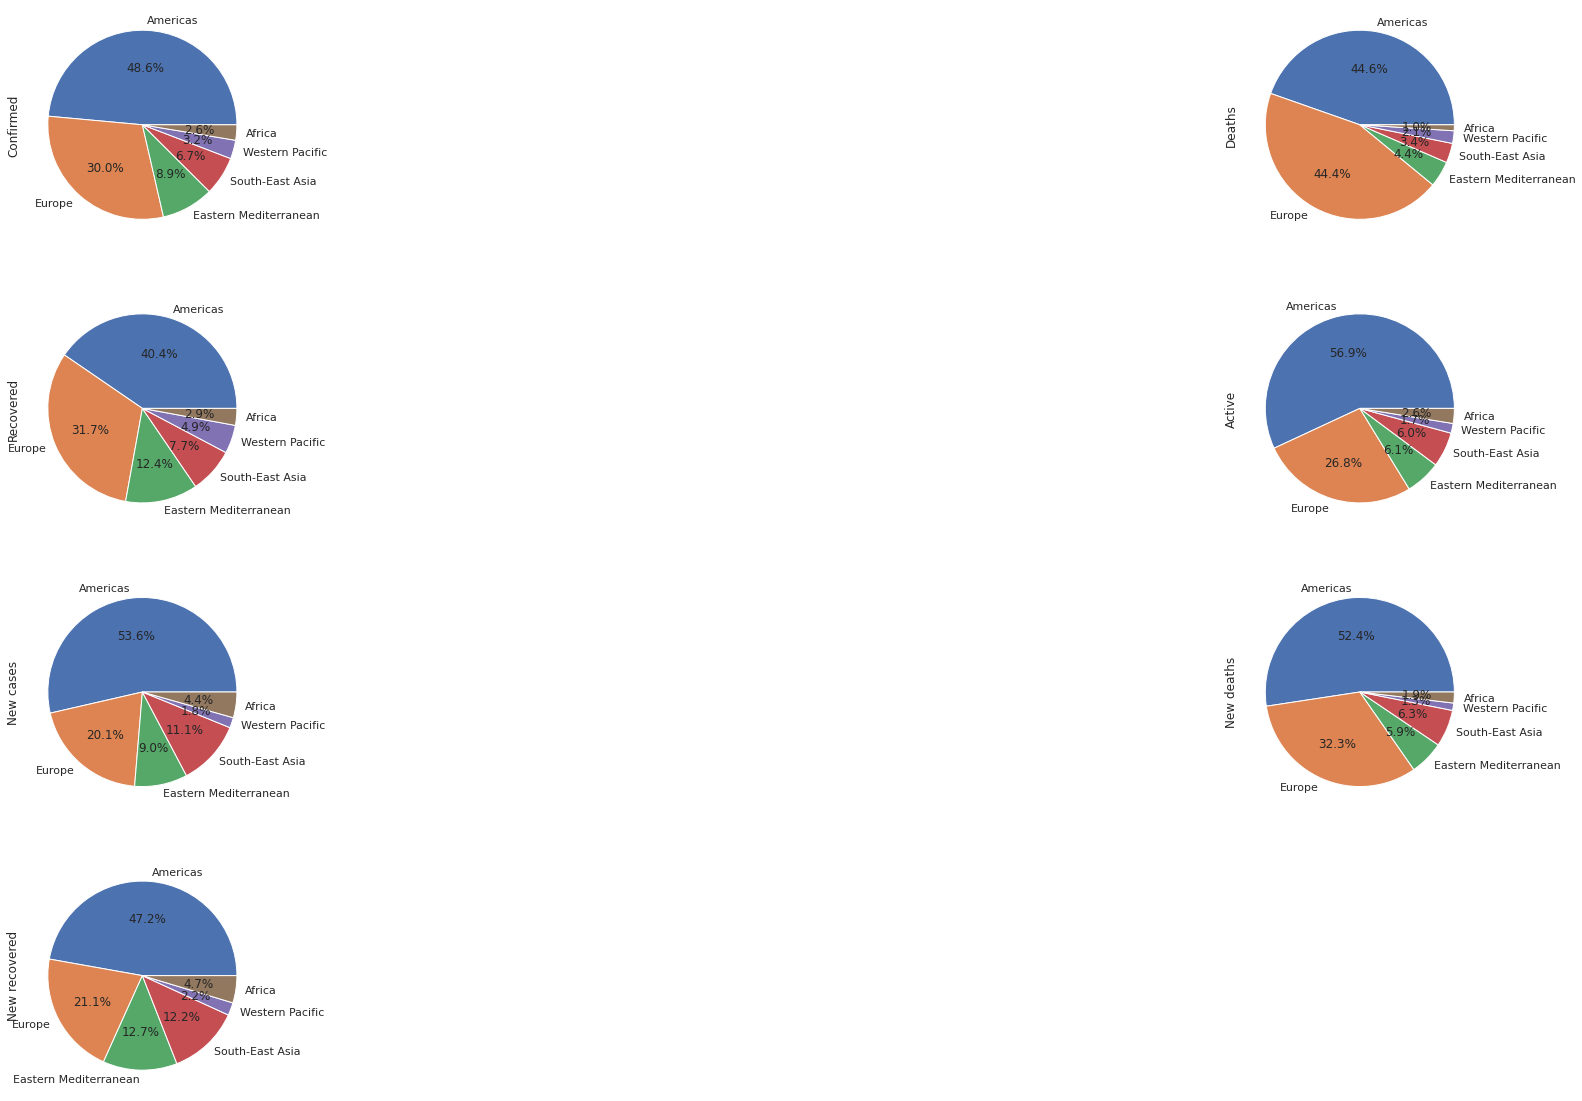

In [352]:
grouped_df.plot.pie(subplots=True, figsize=(40, 20), layout=(4, 2), legend=False, autopct="%1.1f%%")

### Statistics by Country/Region

The main dataframe is grouped by Country/Region and a reducer sum is used to get the total information per country.



In [364]:
# The countries with more confirmed cases are US, Brazil, Russia, India and Spain

grouped_df = df.groupby("Country/Region").sum().sort_values(by="Confirmed", ascending=False)

grouped_df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
US,224345948,11011411,56353416,156981121,4290258,148011,1325804
Brazil,89524967,3938034,54492873,31094060,2442375,87618,1846641
Russia,45408411,619385,25120448,19668578,816680,13334,602249
India,40883464,1111831,23783720,15987913,1480073,33408,951166
Spain,27404045,3033030,15093583,9277432,282827,28432,150376


In [365]:
# Countries with less confirmed cases are Saint Kitts, Greenland, Holy See, Papua
# New Guinea and Western Sahara

grouped_df.tail()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Saint Kitts and Nevis,1772,0,1295,477,17,0,15
Greenland,1507,0,1372,135,14,0,13
Holy See,1356,0,742,614,12,0,12
Papua New Guinea,1185,2,695,488,62,0,11
Western Sahara,901,63,648,190,10,1,8


In [392]:
# Graphs for the following countries will be created to compare their numbers

countries = [
  "US", 
  "Brazil",
  "Russia",
  "India", 
  "Spain",
  "Greenland",
  "Papua New Guinea",
  "Mexico",
  "China",
  "Japan",
  "Norway",
  "Finland"
]

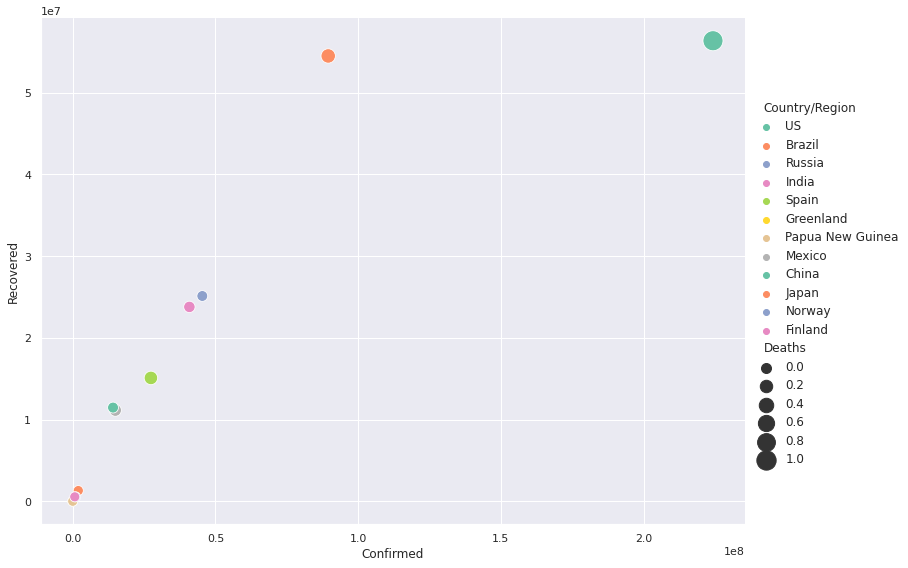

In [394]:
# Relationship between confirmed and recovered people in the selected countries
# as a scatterplot, where te size of the dot is proportional to the 
# number of deaths

sns.relplot(data=grouped_df.loc[countries], x="Confirmed", y="Recovered", 
            hue="Country/Region", height=8, aspect=1.3, size="Deaths", 
            sizes=(100, 400), palette="Set2")

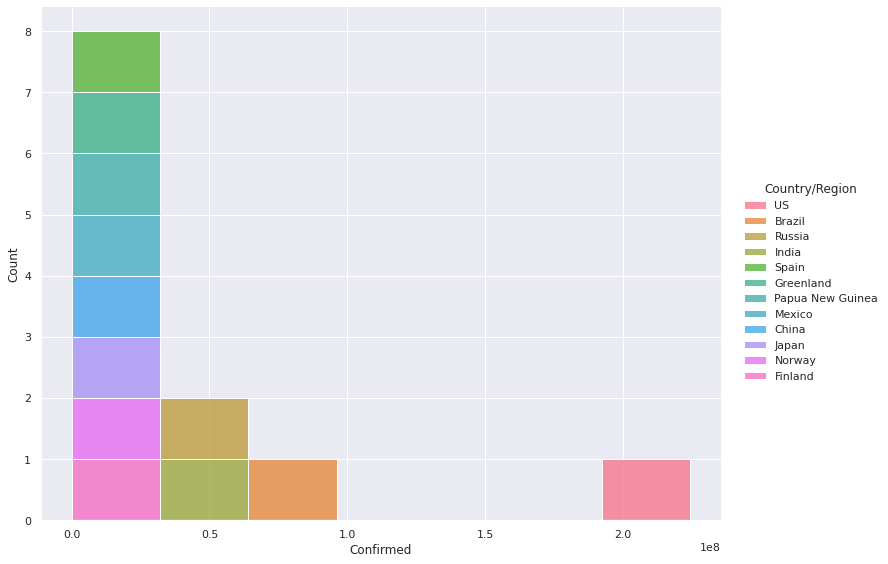

In [412]:
# Histogram of the confirmed cases in the selected countries

sns.displot(data=grouped_df.loc[countries], x="Confirmed", hue="Country/Region", 
            multiple="stack", height=8, aspect=1.3)

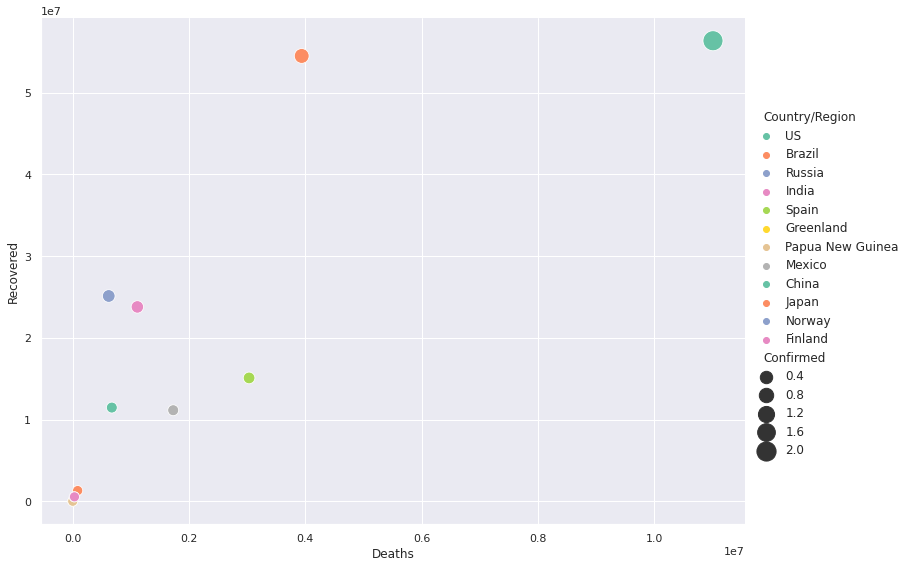

In [413]:
# Relationship between deaths and recovered for the selected countries with the
# size of the dot proportional to the number of confirmed cases

sns.relplot(data=grouped_df.loc[countries], x="Deaths", y="Recovered", 
            hue="Country/Region", height=8, aspect=1.3, size="Confirmed", 
            sizes=(100, 400), palette="Set2")

### Statistics by day

To get the statistics by day the dataframe is grouped by day and then reduced with a sum to get the total information per field.

In [ ]:
# Group by Date and get the total sum of each field
# We can see that the day with the most confirmed cases was 2020-07-27
# and the day with the least was 2020-01-22

# This has sense since we expect the confirmed cases to grow as times goes on 
# and we can see it in the next graph

grouped_df = df.groupby(["Date"]).sum().sort_values(by="Confirmed", ascending=True)

grouped_df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Date,,,,,,,
2020-01-22,555,17,28,510,0,0,0
2020-01-23,654,18,30,606,99,1,2
2020-01-24,941,26,36,879,287,8,6
2020-01-25,1434,42,39,1353,493,16,3
2020-01-26,2118,56,52,2010,684,14,13


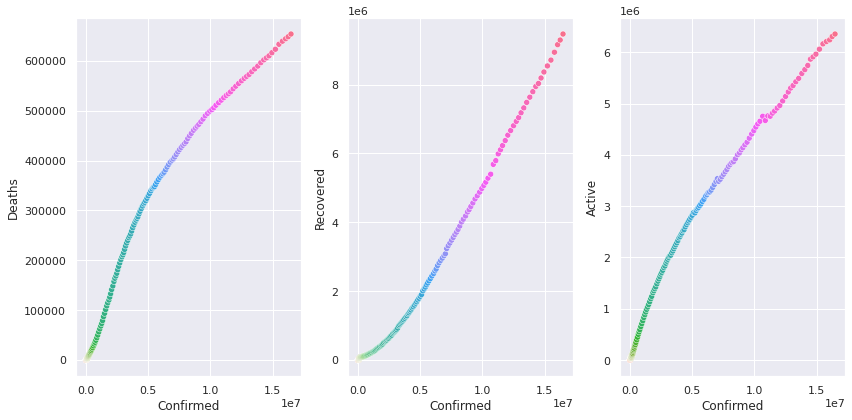

In [ ]:
# The relatonship between these variables are linear, has sense because 
# as time goes on the deaths, recovered and active cases grows 


f, axs = plt.subplots(1, 3, figsize=(12, 6))

sns.scatterplot(x="Confirmed", y="Deaths", hue="Date", legend=False, data=grouped_df, ax=axs[0])
sns.scatterplot(x="Confirmed", y="Recovered", hue="Date", legend=False, data=grouped_df, ax=axs[1])
sns.scatterplot(x="Confirmed", y="Active", hue="Date", legend=False, data=grouped_df, ax=axs[2])

f.tight_layout()

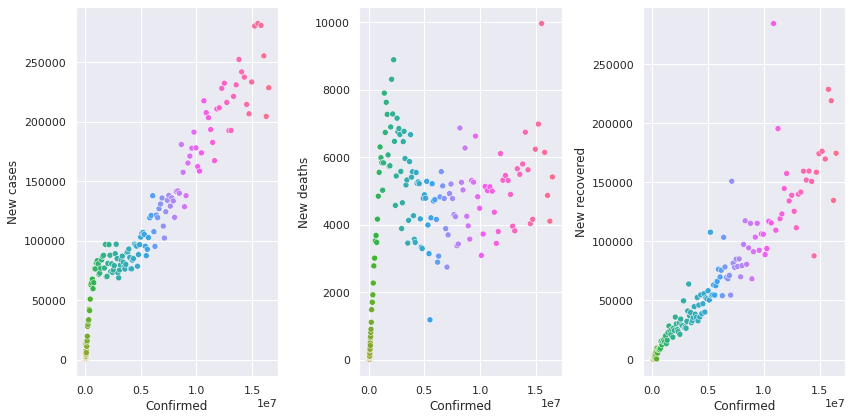

In [ ]:
# Here, the relationships are almost linear because:
# New cases -> are expected to decrease, it happened in some days but then they
# continued to rise

# New deaths -> are expected to decrease and it has happened as time goes on,
# with some exceptions for countries that has not a good control over the virus 

# New recovered -> are expected to increase at it has happened with some limitations


f, axs = plt.subplots(1, 3, figsize=(12, 6))

sns.scatterplot(x="Confirmed", y="New cases", hue="Date", legend=False, data=grouped_df, ax=axs[0])
sns.scatterplot(x="Confirmed", y="New deaths", hue="Date", legend=False, data=grouped_df, ax=axs[1])
sns.scatterplot(x="Confirmed", y="New recovered", hue="Date", legend=False, data=grouped_df, ax=axs[2])

f.tight_layout()

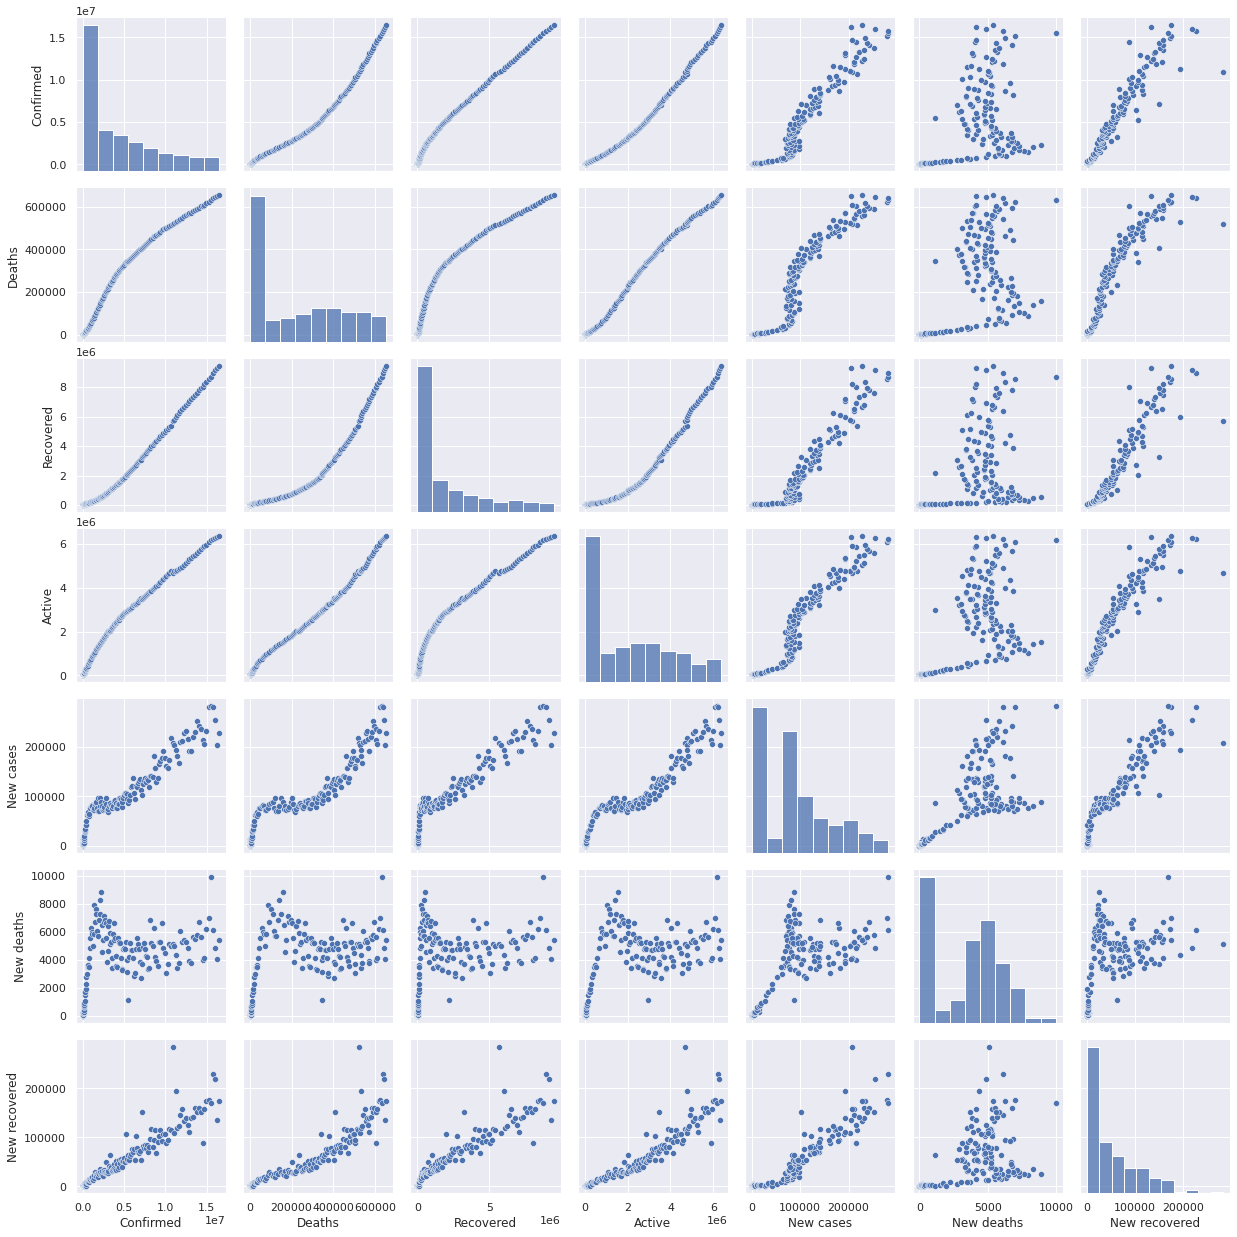

In [ ]:
# A general overview of the data is a pair plot, where every possible combination of variables
# is plotted as a relation between each other.

# The main diagonal represents the marginal distribution of each variable and the other
# rows are the joint distributions. They're the same we did before with Confirmed as 
# the independent variable

sns.pairplot(data=grouped_df, palette="husl")

   Confirmed    Deaths  Recovered     Active New cases New deaths New recovered
0  828508482  43384903  388408229  396715350  16500952     654019       9468059

Death ratio =  5.23650680018023
Recovered ratio =  46.88041672939686
Active ratio =  47.88307647042291



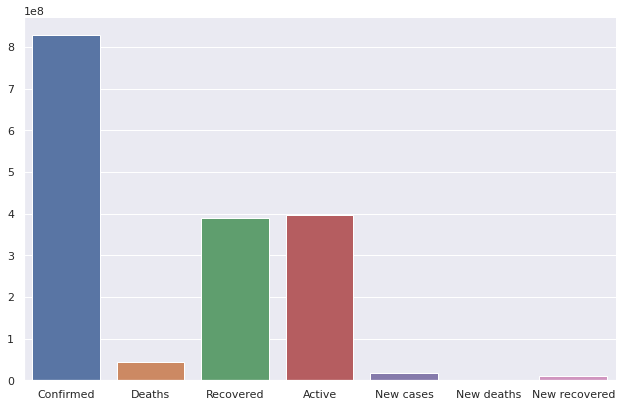

In [415]:
# Get the total numbers of each field in the dataframe grouped by date and plot it!

total = {}

for field in grouped_df:
  total[field] = grouped_df[field].sum()

total_df = pd.DataFrame(columns=total.keys())
total_df.loc[0] = total.values()

print(total_df, end="\n\n")

sns.catplot(data=total_df, kind="bar", height=6, aspect=1.5)

headers = ["Death ratio", "Recovered ratio", "Active ratio"]

print("Death ratio = ", total["Deaths"]/total["Confirmed"]*100)
print("Recovered ratio = ", total["Recovered"]/total["Confirmed"]*100)
print("Active ratio = ", total["Active"]/total["Confirmed"]*100, end="\n\n")

## What about Mexico ?

How are the statistics for Mexico in the dataset?

In [426]:
filter = df["Country/Region"] == "Mexico"

df_mexico = df[filter]

df_mexico

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
111,2020-01-22,Mexico,0,0,0,0,0,0,0,Americas
298,2020-01-23,Mexico,0,0,0,0,0,0,0,Americas
485,2020-01-24,Mexico,0,0,0,0,0,0,0,Americas
672,2020-01-25,Mexico,0,0,0,0,0,0,0,Americas
859,2020-01-26,Mexico,0,0,0,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
34332,2020-07-23,Mexico,370712,41908,275454,53350,8438,718,5307,Americas
34519,2020-07-24,Mexico,378285,42645,283382,52258,7573,737,7928,Americas
34706,2020-07-25,Mexico,385036,42645,288819,53572,6751,0,5437,Americas
34893,2020-07-26,Mexico,390516,43680,295222,51614,5480,1035,6403,Americas


In [450]:
# The first confirmed cases for Mexico in the dataset started to be registered 
# from February 28 as is said in the forbes news: 
# https://www.forbes.com.mx/confirman-el-primer-caso-de-coronavirus-covid-19-en-mexico/

filter = (df_mexico["Confirmed"] > 0) & (df_mexico["New recovered"] > 0)
 
df_mexico = df_mexico[filter].reset_index(drop=True)

df_mexico.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-03-03,Mexico,5,0,1,4,0,0,1,Americas
1,2020-03-10,Mexico,7,0,4,3,0,0,3,Americas
2,2020-03-30,Mexico,1094,28,35,1031,101,8,31,Americas
3,2020-04-03,Mexico,1688,60,633,995,178,10,598,Americas
4,2020-04-12,Mexico,4661,296,1772,2593,442,23,1139,Americas


In [451]:
# Grouping the dataframe by date and them summing all the values for each one
# we see that the day with the most confirmed cases were in 2020-07-25

grouped_df = df_mexico.groupby("Date").sum().sort_values(by="Active", 
                                                         ascending=True)
grouped_df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Date,,,,,,,
2020-03-10,7,0,4,3,0,0,3
2020-03-03,5,0,1,4,0,0,1
2020-04-03,1688,60,633,995,178,10,598
2020-03-30,1094,28,35,1031,101,8,31
2020-04-12,4661,296,1772,2593,442,23,1139
...,...,...,...,...,...,...,...
2020-07-22,362274,41190,270147,50937,6019,790,2740
2020-07-26,390516,43680,295222,51614,5480,1035,6403
2020-07-24,378285,42645,283382,52258,7573,737,7928


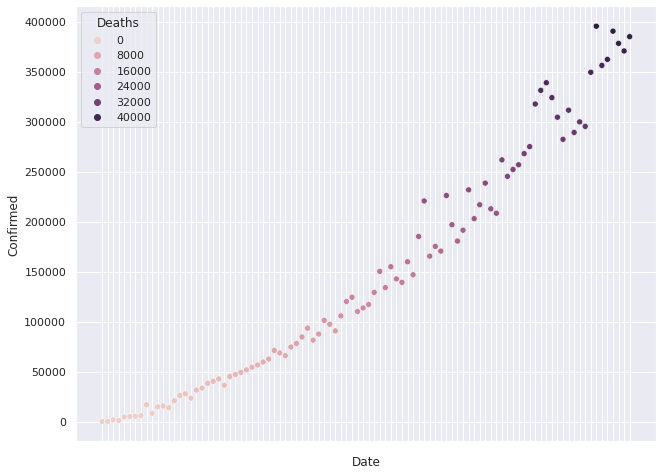

In [452]:
# Show how the confirmed cases are changing over time with a colormap that
# represents the number of deaths

f, ax = plt.subplots(figsize=(1.3*8, 8))

f = sns.scatterplot(data=grouped_df, x="Date", y="Confirmed", hue="Deaths", 
                legend=True, ax=ax)

_ = ax.set_xticklabels([])

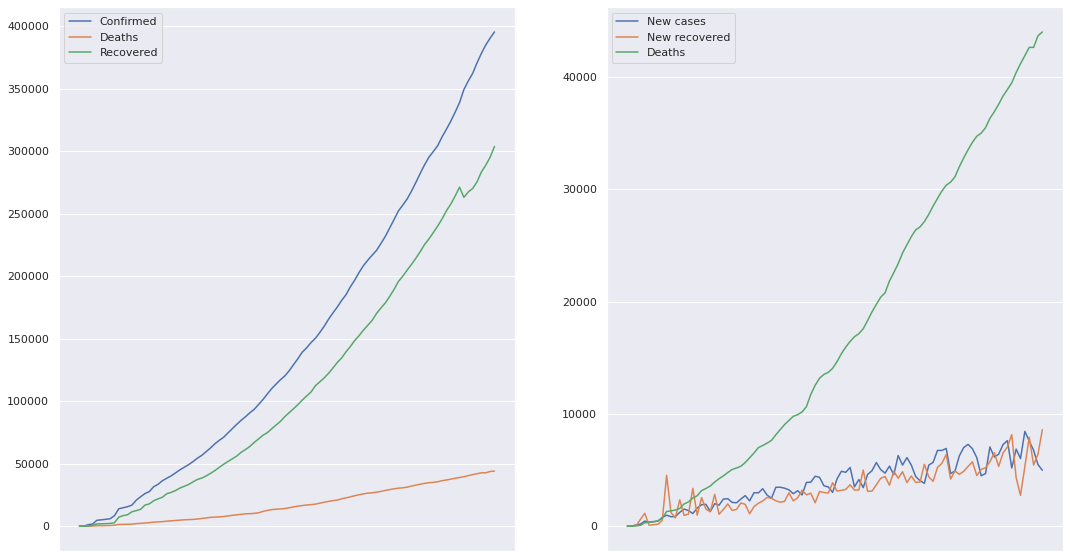

In [453]:
# As we can see, the number of confirmed cases are in growth since the
# first day but also the recovered ones are more than the number 
# of deaths.

# Also, the new cases per day are fluctuating but going up while
# the recovered ones almost matching the new cases. This means 
# that some people are getting infected but also, approximately
# the same ammount of them are getting recovered.
# The people dying from covid 19 is still rising.



plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.plot(df_mexico["Date"], df_mexico["Confirmed"])
plt.plot(df_mexico["Date"], df_mexico["Deaths"])
plt.plot(df_mexico["Date"], df_mexico["Recovered"])
plt.xticks([])
plt.legend(["Confirmed", 
            "Deaths", 
            "Recovered"])
plt.subplot(1, 2, 2)
plt.plot(df_mexico["Date"], df_mexico["New cases"])
plt.plot(df_mexico["Date"], df_mexico["New recovered"])
plt.plot(df_mexico["Date"], df_mexico["Deaths"])
plt.xticks([])
plt.legend(["New cases",
            "New recovered",
            "Deaths"])
plt.show()

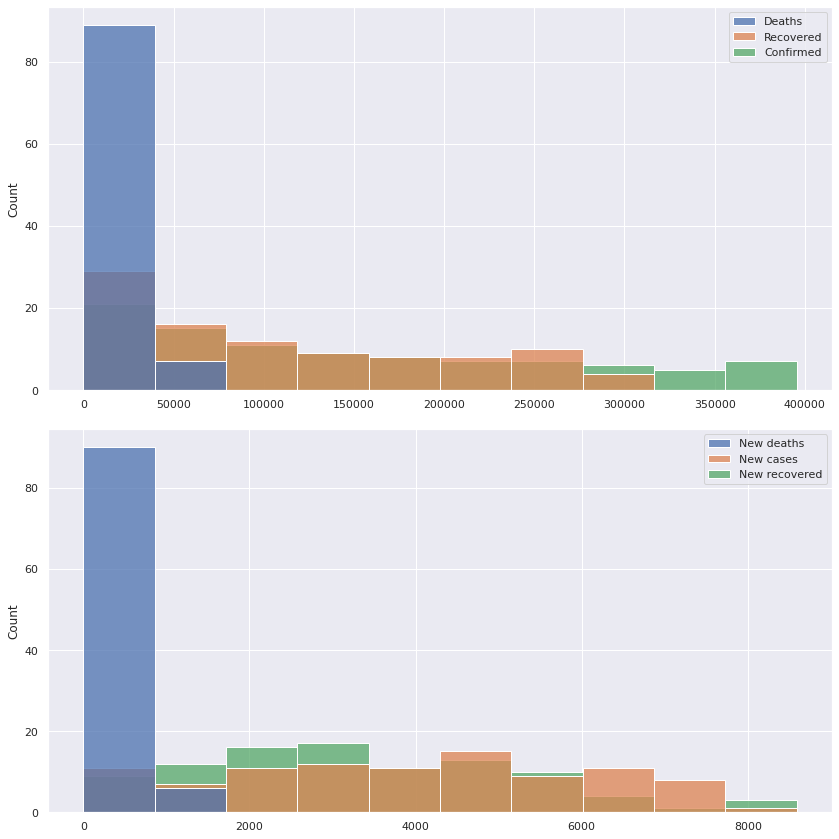

In [454]:
# Histogram
# Frequency plot for each numeric field


f, axs = plt.subplots(2, 1, figsize=(12, 12))

sns.histplot(data=df_mexico[["Deaths", "Recovered", "Confirmed"]], 
            multiple="stack", ax=axs[0])

sns.histplot(data=df_mexico[["New deaths", "New cases", "New recovered"]], 
            multiple="stack", ax=axs[1])

f.tight_layout()